In [55]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [56]:
os.getcwd()

'/Users/fess/Documents/GitHub/HSE-FF/6th semester/Auge'

In [57]:
data_1 = pd.read_csv('Data/group4_1.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
data_1.head()

<ipython-input-57-bfae0e9e68ea>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_1 = pd.read_csv('Data/group4_1.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
<ipython-input-57-bfae0e9e68ea>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_1 = pd.read_csv('Data/group4_1.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)


,E,der
0,40.028,-380.8
1,40.251,-383.2
2,40.474,-381.3
3,40.698,-374.1
4,40.921,-362.6


In [58]:
float(data_1['E'][0])

40.028

In [59]:
data_2 = pd.read_csv('Data/group4_2.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
data_2.head()

<ipython-input-59-437e9781eaf1>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_2 = pd.read_csv('Data/group4_2.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
<ipython-input-59-437e9781eaf1>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_2 = pd.read_csv('Data/group4_2.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)


,E,der
0,1000.012,-56.5
1,1000.235,-57.2
2,1000.458,-58.3
3,1000.682,-62.9
4,1000.905,-55.5


In [60]:
data_3 = pd.read_csv('Data/group4_3.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
data_3.head()

<ipython-input-60-f234c8592217>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_3 = pd.read_csv('Data/group4_3.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)
<ipython-input-60-f234c8592217>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data_3 = pd.read_csv('Data/group4_3.txt', skiprows=20, delimiter='     ', names=['E', 'der'], dtype=np.float, skipfooter=3)


,E,der
0,19.957,-517.8
1,20.181,-601.0
2,20.404,-596.8
3,20.627,-567.5
4,20.851,-528.0


In [61]:
data_4 = pd.concat((data_1, data_2))
data_4.head()

,E,der
0,40.028,-380.8
1,40.251,-383.2
2,40.474,-381.3
3,40.698,-374.1
4,40.921,-362.6


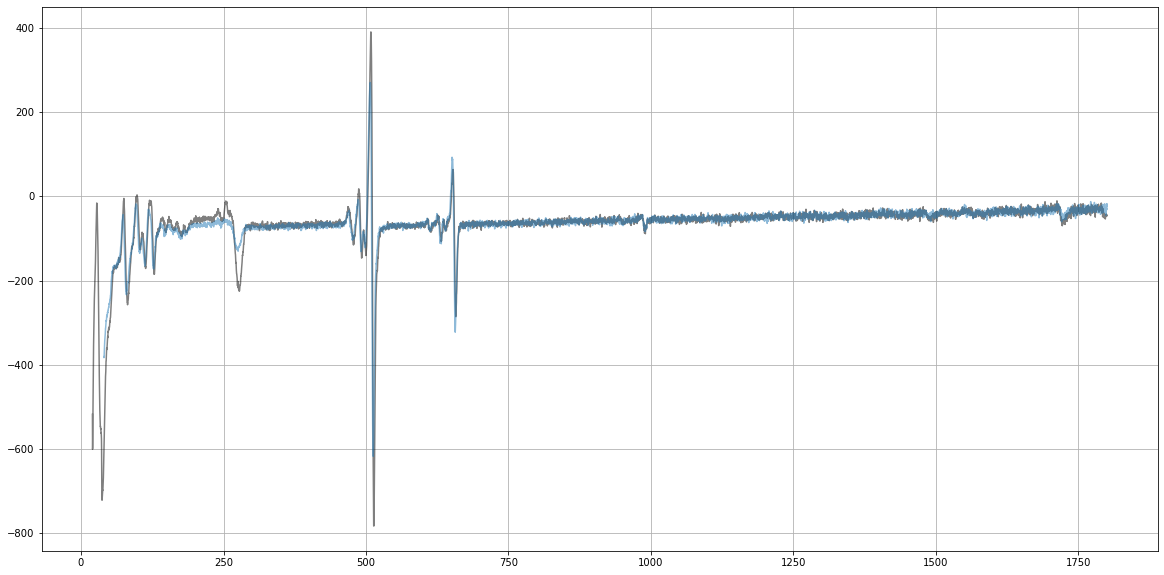

In [62]:
plt.figure(figsize=(20, 10))

plt.plot(data_3['E'].values, data_3['der'].values, color='black', alpha=0.5)
plt.plot(data_4['E'].values, data_4['der'].values, alpha=0.5)

plt.grid()
plt.show()

In [63]:
# Trying to filter some shit
from scipy.signal import lfilter

n = 25  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

from scipy.signal import find_peaks

## 3000 eV analysis

In [64]:
indexes = find_peaks(-1 * lfilter(b, a, data_4['der'].values), height=30, prominence=10, threshold=0)[0]
data_4['E'].values[indexes], indexes

(array([  45.387,   83.124,  114.386,  130.24 ,  150.337,  177.356,
         277.616,  479.477,  495.108,  515.874,  614.795,  633.552,
         659.901,  992.614, 1491.266, 1570.09 , 1725.505]),
 array([  24,  193,  333,  404,  494,  615, 1064, 1968, 2038, 2131, 2574,
        2658, 2776, 4266, 6500, 6853, 7549]))

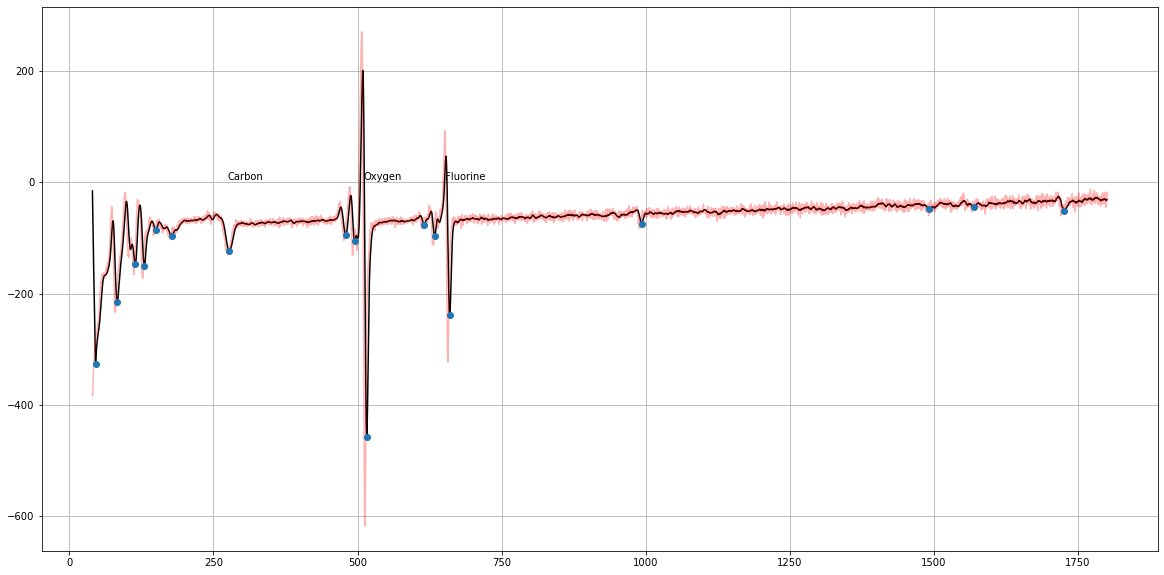

In [65]:
plt.figure(figsize=(20, 10))

plt.plot(data_4['E'].values, lfilter(b, a, data_4['der'].values), color='black')
plt.plot(data_4['E'].values, data_4['der'].values, color='red', alpha=0.3)
plt.plot(data_4['E'].values[indexes], lfilter(b, a, data_4['der'].values)[indexes], 'o')
#plt.plot(963, lfilter(b, a, data_3['der'].values)[923], 'o', color='blue', alpha=0.3)

plt.annotate('Carbon', (275, 5))
plt.annotate('Oxygen', (510, 5))
plt.annotate('Fluorine', (652.37120047, 5))


plt.grid()
plt.show()

## Recalibrating 3000 eV

In [66]:
# New book
A = 117500 / 119129
B = 140595 / 119129 

# Old book

#AA = 
#BB = 

In [67]:
def recalib(x, a=A, b=B):
    return x * a + b

In [68]:
data_4['E'] = recalib(data_4['E'])

In [69]:
indexes = find_peaks(-1 * lfilter(b, a, data_4['der'].values), height=30, prominence=10, threshold=0)[0]
data_4['E'].values[indexes].round(), indexes

(array([  46.,   83.,  114.,  130.,  149.,  176.,  275.,  474.,  490.,
         510.,  608.,  626.,  652.,  980., 1472., 1550., 1703.]),
 array([  24,  193,  333,  404,  494,  615, 1064, 1968, 2038, 2131, 2574,
        2658, 2776, 4266, 6500, 6853, 7549]))

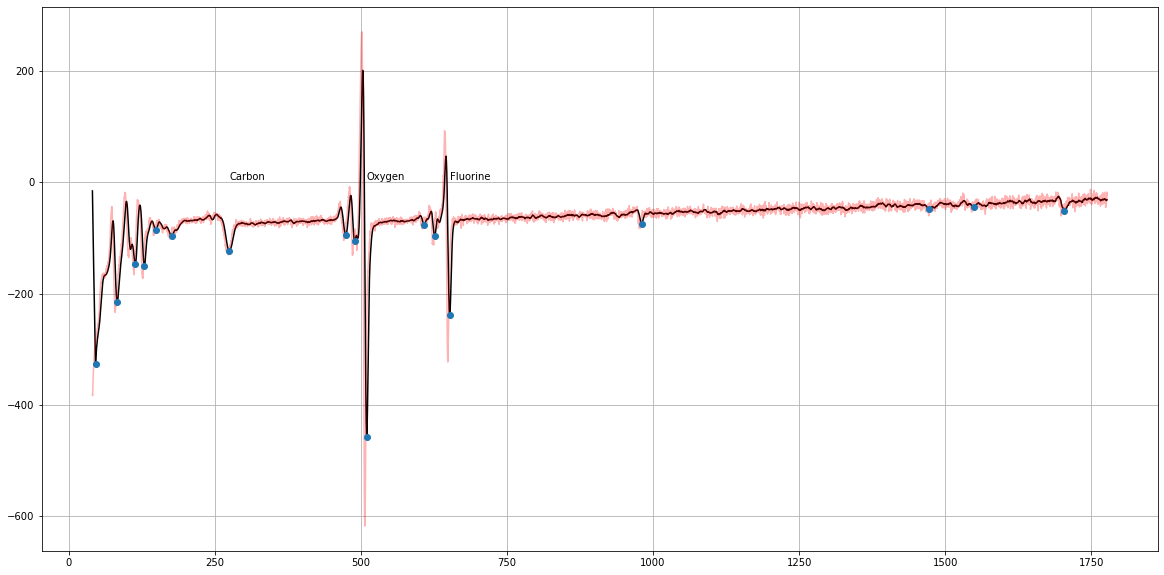

In [70]:
plt.figure(figsize=(20, 10))

plt.plot(data_4['E'].values, lfilter(b, a, data_4['der'].values), color='black')
plt.plot(data_4['E'].values, data_4['der'].values, color='red', alpha=0.3)
plt.plot(data_4['E'].values[indexes], lfilter(b, a, data_4['der'].values)[indexes], 'o')
#plt.plot(963, lfilter(b, a, data_3['der'].values)[923], 'o', color='blue', alpha=0.3)

plt.annotate('Carbon', (275, 5))
plt.annotate('Oxygen', (510, 5))
plt.annotate('Fluorine', (652.37120047, 5))


plt.grid()
plt.show()

* Carbon -- 275 (new) vs 279.652 (real) vs 271 (old)

* Oxygen -- 510 (new) vs 517.017 (real) vs 503 (old)

## Recalibrating

In [71]:
# New book
A = 47000 / 47473
B = -88569 / 47473 

# Old book

#AA = 
#BB = 

In [72]:
def recalib(x, a=A, b=B):
    return x * a + b

In [73]:
data_3['E'] = recalib(data_3['E'])

In [74]:
indexes = find_peaks(-1 * lfilter(b, a, data_3['der'].values), height=30, prominence=15, threshold=0)[0]
data_3['E'].values[indexes].round()#, indexes

array([  23.,   38.,   82.,  113.,  128.,  148.,  176.,  246.,  275.,
        474.,  489.,  510.,  608.,  627.,  652.,  981., 1475., 1708.])

In [75]:
 data_3['der'].values[4355] / data_3['der'].values[92] * 100

12.88141470180305

In [76]:
data_3['E'].values[4355]

980.6633244159839

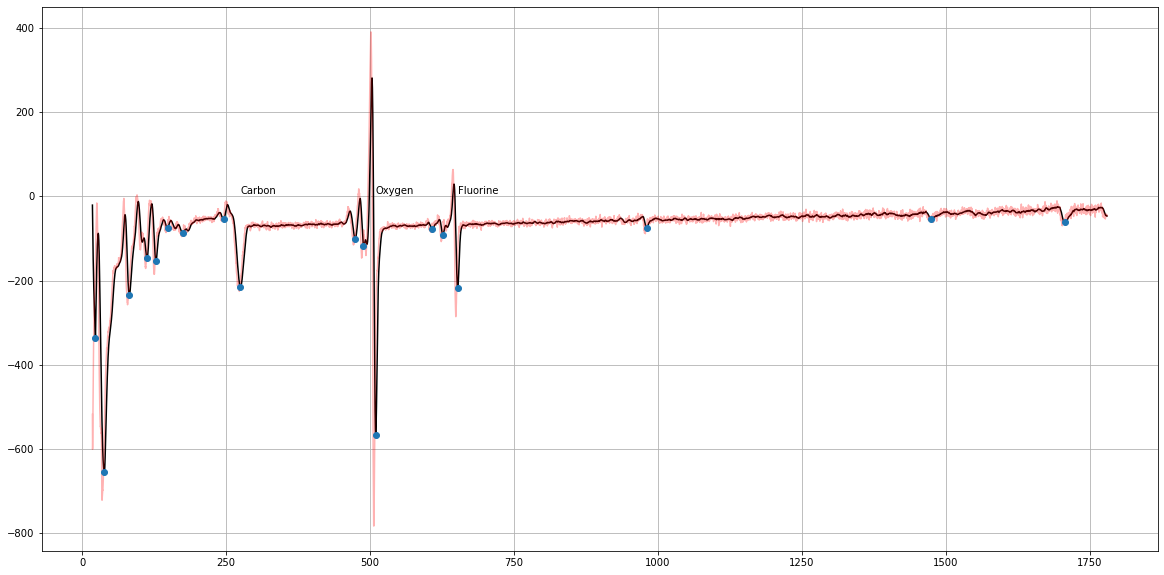

In [77]:
plt.figure(figsize=(20, 10))
#plt.plot(lfilter(b, a, data_1['E'].values), data_1['der'].values, alpha=0.5)
#plt.plot(lfilter(b, a, data_2['E'].values), data_2['der'].values, alpha=0.5)
plt.plot(data_3['E'].values, lfilter(b, a, data_3['der'].values), color='black')
plt.plot(data_3['E'].values, data_3['der'].values, color='red', alpha=0.3)
plt.plot(data_3['E'].values[indexes], lfilter(b, a, data_3['der'].values)[indexes], 'o')
#plt.plot(963, lfilter(b, a, data_3['der'].values)[923], 'o', color='blue', alpha=0.3)

plt.annotate('Carbon', (275, 5))
plt.annotate('Oxygen', (510, 5))
plt.annotate('Fluorine', (652.37120047, 5))


plt.grid()
plt.show()

In [78]:
#pd.read_csv('Data_STS/Series_3.txt', skiprows=25, delimiter='   ')
data_STS = np.genfromtxt('Data_STS/Series_3.txt', skip_header=25)
data_STS[:5]

array([[-5.0000e+02, -1.0700e+01, -7.8320e+00, -1.0700e+01, -1.0700e+01,
        -1.0700e+01, -2.7000e-01, -5.6000e-02, -2.5100e-01, -3.0100e-01,
        -4.3600e-01,  4.5747e+01,  4.5750e+01,  4.5754e+01,  4.5755e+01,
         4.5745e+01,  4.5752e+01,  4.5768e+01,  4.5757e+01,  4.5751e+01,
         4.5744e+01],
       [-4.9400e+02, -1.0700e+01, -7.3810e+00, -1.0700e+01, -1.0700e+01,
        -1.0700e+01, -2.7800e-01, -5.7000e-02, -2.6100e-01, -2.5200e-01,
        -4.0700e-01,  4.5746e+01,  4.5748e+01,  4.5756e+01,  4.5755e+01,
         4.5747e+01,  4.5754e+01,  4.5774e+01,  4.5759e+01,  4.5754e+01,
         4.5749e+01],
       [-4.8800e+02, -1.0700e+01, -7.3780e+00, -1.0700e+01, -1.0700e+01,
        -1.0700e+01, -2.4700e-01, -6.0000e-02, -2.6800e-01, -2.5400e-01,
        -4.1100e-01,  4.5745e+01,  4.5748e+01,  4.5758e+01,  4.5750e+01,
         4.5747e+01,  4.5751e+01,  4.5769e+01,  4.5754e+01,  4.5752e+01,
         4.5748e+01],
       [-4.8210e+02, -1.0700e+01, -7.1170e+00, -1.0700e+01

In [79]:
def calc_sum_der(data, n):
    return (data_STS[1:, n] + data_STS[1:, n+5] - data_STS[:-1, n] - data_STS[:-1, n+5]) / (data_STS[1:, 0] - data_STS[:-1, 0])

In [80]:
for i in range(1, 6):
    res = 0
    res += calc_sum_der(data_STS, i)
    res /= 5

In [84]:
n = 40  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

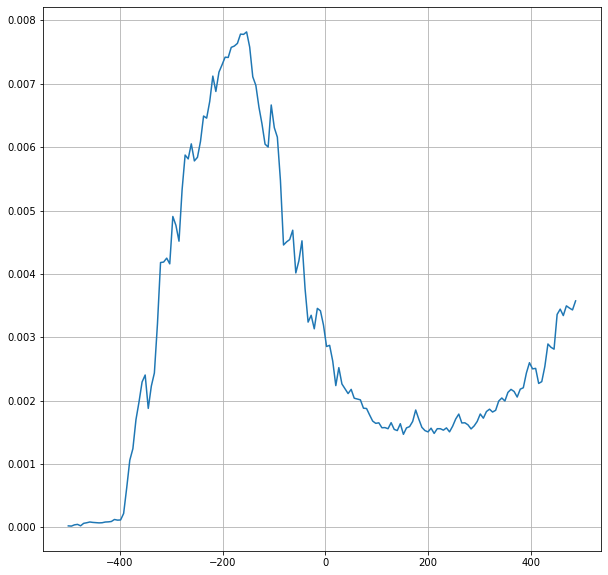

In [87]:
plt.figure(figsize=(10, 10))
plt.plot(data_STS[:-1, 0], lfilter(b, a, res))
plt.grid()
plt.show()

In [83]:
lfilter(b, a, data_4['der'].values)

array([-15.232, -30.56 , -45.812, ..., -31.964, -31.42 , -31.332])